### Conditional Graph
##### Objectives:
1. Implement `conditional` logic to route the flow of data to different nodes.
2. Use `Start` and `End` nodes to manage entry and exit points explicitly.
3. Design multiple nodes to perform different operation (addition,substraction)
4. Create a `router node` to handle decision-making and control graph flow.

***Main Goal: How to use add_conditional_edges()***

In [2]:
from typing import Dict, TypedDict, List 
from langgraph.graph import StateGraph, START, END 

In [3]:
class AgentState(TypedDict):
    number1: int 
    operation: str 
    number2: int 
    finalNumber: int 

In [ ]:
def adder(state: AgentState) -> AgentState:
    """This node adds the numbers"""
    
    state['finalNumber'] = state["number1"] + state["number2"]
    return state

def substractor(state:AgentState) -> AgentState:
    """This node substract the 2 numbers"""
    state['finalNumber'] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("substract_node",substractor)
graph.add_node("router",lambda state:state) # passthrough function 

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    
    {
        # Edge: Node
        "addition_operation":"add_node",
        'subtraction_operation':"substract_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge("substract_node", END)

app = graph.compile()


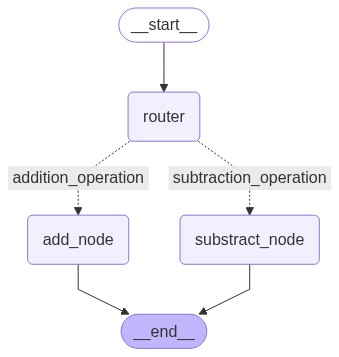

In [9]:
from IPython.display import Image, display 
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state_1 = AgentState(number1=10, operation="-", number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}
